# Import Necessary libraries

In [1]:
#import the necessary libraries to perform the operation to clean and visualize data
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [2]:
#Set pandas options to view entire rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Inspection and Duplicate Removal

In [3]:
#Reading dataset from csv file and display first five rows of the dataset
df = pd.read_csv('Around_World.csv', sep = ',')
df.head()

Data Source World Development Indicators  \
0                NaN                          NaN   
1  Last Updated Date                     7/1/2020   
2                NaN                          NaN   
3       Country Name                 Country Code   
4              Aruba                          ABW   

                                Unnamed: 2      Unnamed: 3  Unnamed: 4  \
0                                      NaN             NaN         NaN   
1                                      NaN             NaN         NaN   
2                                      NaN             NaN         NaN   
3                           Indicator Name  Indicator Code    1960.000   
4  Life expectancy at birth, total (years)  SP.DYN.LE00.IN      65.662   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  \
0         NaN         NaN         NaN         NaN         NaN          NaN   
1         NaN         NaN         NaN         NaN         NaN          NaN   
2         NaN         NaN         NaN         NaN         NaN          NaN   
3    1961.000    1962.000    1963.000    1964.000    1965.000     1966.000   
4      66.074      66.444      66.787      67.113      67.435       67.762   

   Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3     1967.000     1968.000     1969.000      1970.00     1971.000   
4       68.095       68.436       68.784        69.14       69.498   

   Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3     1972.000     1973.000     1974.000     1975.000      1976.00   
4       69.851       70.191       70.519       70.833        71.14   

   Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3     1977.000     1978.000     1979.000     1980.000     1981.000   
4       71.441       71.736       72.023       72.293       72.538   

   Unnamed: 26  Unnamed: 27  Unnamed: 28  Unnamed: 29  Unnamed: 30  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3     1982.000     1983.000     1984.000     1985.000     1986.000   
4       72.751       72.929       73.071       73.181       73.262   

   Unnamed: 31  Unnamed: 32  Unnamed: 33  Unnamed: 34  Unnamed: 35  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3     1987.000     1988.000     1989.000     1990.000     1991.000   
4       73.325       73.378       73.425       73.468       73.509   

   Unnamed: 36  Unnamed: 37  Unnamed: 38  Unnamed: 39  Unnamed: 40  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3     1992.000     1993.000     1994.000     1995.000     1996.000   
4       73.544       73.573       73.598       73.622       73.646   

   Unnamed: 41  Unnamed: 42  Unnamed: 43  Unnamed: 44  Unnamed: 45  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN

As we can see that there is a problem in dataset, so we want to make row 3 our header row

In [10]:
#This code is copied from stack overflow to remove all rows before Country Name which are not useful
# Run it four times to make Country Name Row as a header row
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header



In [11]:
#Again check the fisrt five rows of the dataset
df.head()

3 Country Name Country Code                           Indicator Name  \
4        Aruba          ABW  Life expectancy at birth, total (years)   
5  Afghanistan          AFG  Life expectancy at birth, total (years)   
6       Angola          AGO  Life expectancy at birth, total (years)   
7      Albania          ALB  Life expectancy at birth, total (years)   
8      Andorra          AND  Life expectancy at birth, total (years)   

3  Indicator Code  1960.0  1961.0  1962.0  1963.0  1964.0  1965.0  1966.0  \
4  SP.DYN.LE00.IN  65.662  66.074  66.444  66.787  67.113  67.435  67.762   
5  SP.DYN.LE00.IN  32.446  32.962  33.471  33.971  34.463  34.948  35.430   
6  SP.DYN.LE00.IN  37.524  37.811  38.113  38.430  38.760  39.102  39.454   
7  SP.DYN.LE00.IN  62.283  63.301  64.190  64.914  65.463  65.850  66.110   
8  SP.DYN.LE00.IN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

3  1967.0  1968.0  1969.0  1970.0  1971.0  1972.0  1973.0  1974.0  1975.0  \
4  68.095  68.436  68.784  69.140  69.498  69.851  70.191  70.519  70.833   
5  35.914  36.403  36.900  37.409  37.930  38.461  39.003  39.558  40.128   
6  39.813  40.178  40.546  40.914  41.282  41.650  42.016  42.374  42.721   
7  66.304  66.487  66.689  66.935  67.237  67.582  67.953  68.343  68.736   
8     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

3  1976.0  1977.0  1978.0  1979.0  1980.0  1981.0  1982.0  1983.0  1984.0  \
4  71.140  71.441  71.736  72.023  72.293  72.538  72.751  72.929  73.071   
5  40.715  41.320  41.944  42.585  43.244  43.923  44.617  45.324  46.040   
6  43.053  43.367  43.660  43.931  44.178  44.404  44.611  44.799  44.966   
7  69.110  69.448  69.742  69.991  70.208  70.416  70.635  70.876  71.134   
8     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

3  1985.0  1986.0  1987.0  1988.0  1989.0  1990.0  1991.0  1992.0  1993.0  \
4  73.181  73.262  73.325  73.378  73.425  73.468  73.509  73.544  73.573   
5  46.761  47.486  48.211  48.930  49.640  50.331  50.999  51.641  52.256   
6  45.107  45.213  45.283  45.317  45.324  45.306  45.271  45.230  45.201   
7  71.388  71.605  71.760  71.843  71.860  71.836  71.803  71.802  71.860   
8     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

3  1994.0  1995.0  1996.0  1997.0  1998.0  1999.0  2000.0  2001.0  2002.0  \
4  73.598  73.622  73.646  73.671  73.700  73.738  73.787  73.853  73.937   
5  52.842  53.398  53.924  54.424  54.906  55.376  55.841  56.308  56.784   
6  45.201  45.246  45.350  45.519  45.763  46.093  46.522  47.059  47.702   
7  71.992  72.205  72.495  72.838  73.208  73.587  73.955  74.288  74.579   
8     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

3  2003.0  2004.0  2005.0  2006.0  2007.0  2008.0  2009.0  2010.0  2011.0  \
4  74.038  74.156  74.287  74.429  74.576  74.725  74.872  75.017  75.158   
5  57.271  57.772  58.290  58.826  59.375  59.930  60.484  61.028  61.553   
6  48.440  49.263  50.165  51.143  52.177  53.243  54.311  55.350  56.330   
7  74.828  75.039  75.228  75.423  75.646  75.912  76.221  76.562  76.914   
8     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

3  2012.0  2013.0  2014.0  2015.0  2016.0  2017.0  2018.0  2019.0  
4  75.299  75.441  75.583  75.725  75.868  76.010  76.152     NaN  
5  62.054  62.525  62.966  63.377  63.763  64.130  64.486     NaN  
6  57.236  58.054  58.776  59.398  59.925  60.379  60.782     NaN  
7  77.252  77.554  77.813  78.025  78.194  78.333  78.458     NaN  
8     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN

In [24]:
# Check tail. So the list is alphabetically sorted with respect to Country Code

df.tail(5)

3    Country Name Country Code                           Indicator Name  \
263        Kosovo          XKX  Life expectancy at birth, total (years)   
264   Yemen, Rep.          YEM  Life expectancy at birth, total (years)   
265  South Africa          ZAF  Life expectancy at birth, total (years)   
266        Zambia          ZMB  Life expectancy at birth, total (years)   
267      Zimbabwe          ZWE  Life expectancy at birth, total (years)   

3    Indicator Code  1960.0  1961.0  1962.0  1963.0  1964.0  1965.0  1966.0  \
263  SP.DYN.LE00.IN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
264  SP.DYN.LE00.IN  29.919  30.163  30.500  30.943  31.501  32.175  32.960   
265  SP.DYN.LE00.IN  48.406  48.777  49.142  49.509  49.888  50.284  50.705   
266  SP.DYN.LE00.IN  46.687  47.084  47.446  47.772  48.068  48.351  48.643   
267  SP.DYN.LE00.IN  53.019  53.483  53.946  54.403  54.849  55.274  55.671   

3    1967.0  1968.0  1969.0  1970.0  1971.0  1972.0  1973.0  1974.0  1975.0  \
263     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
264  33.836  34.780  35.780  36.820  37.888  38.981  40.093  41.219  42.364   
265  51.148  51.615  52.106  52.620  53.157  53.713  54.281  54.856  55.428   
266  48.960  49.313  49.700  50.114  50.542  50.961  51.351  51.700  51.999   
267  56.034  56.362  56.656  56.913  57.135  57.329  57.509  57.688  57.892   

3    1976.0  1977.0  1978.0  1979.0  1980.0     1981.0     1982.0     1983.0  \
263     NaN     NaN     NaN     NaN     NaN  65.897561  66.197561  66.397561   
264  43.540  44.753  46.000  47.265  48.532  49.778000  50.981000  52.117000   
265  55.990  56.538  57.071  57.590  58.107  58.637000  59.191000  59.766000   
266  52.247  52.449  52.607  52.722  52.802  52.863000  52.905000  52.915000   
267  58.150  58.470  58.850  59.274  59.731  60.203000  60.650000  61.025000   

3       1984.0     1985.0     1986.0     1987.0     1988.0    1989.0  \
263  66.597561  66.797561  66.997561  67.197561  67.397561  67.54878   
264  53.170000  54.120000  54.959000  55.692000  56.331000  56.88100   
265  60.353000  60.946000  61.540000  62.109000  62.619000  63.03500   
266  52.870000  52.720000  52.402000  51.888000  51.173000  50.28200   
267  61.280000  61.356000  61.199000  60.792000  60.136000  59.23500   

3      1990.0    1991.0  1992.0    1993.0  1994.0    1995.0  1996.0    1997.0  \
263  67.74878  67.94878  68.100  68.24878  68.400  68.55122  68.700  68.85122   
264  57.34600  57.73000  58.047  58.31800  58.566  58.81700  59.096  59.41500   
265  63.30700  63.38400  63.247  62.89400  62.331  61.56100  60.595  59.48900   
266  49.24900  48.12500  46.987  45.91900  44.983  44.24200  43.735  43.46100   
267  58.10000  56.74900  55.243  53.65300  52.044  50.48000  49.009  47.66100   

3      1998.0    1999.0    2000.0     2001.0     2002.0     2003.0     2004.0  \
263  68.95122  66.95122  67.95122  67.997561  67.943902  68.195122  68.446341   
264  59.78200  60.20400  60.68300  61.216000  61.781000  62.358000  62.931000   
265  58.31500  57.14400  56.04800  55.089000  54.310000  53.749000  53.444000   
266  43.41300  43.59400  44.00000  44.615000  45.400000  46.322000  47.354000   
267  46.46600  45.46100  44.64900  44.010000  43.523000  43.195000  43.065000   

3       2005.0     2006.0     2007.0     2008.0    2009.0  2010.0    2011.0  \
263  68.695122  68.946341  69.197561  69.397561  69.64878  69.900  70.14878   
264  63.481000  63.997000  64.470000  64.892000  65.25500  65.549  65.76800   
265  53.447000  53.795000  54.452000  55.360000  56.46000  57.669  58.89500   
266  48.496000  49.757000  51.134000  52.606000  54.13000  55.655  57.12600   
267  43.241000  43.853000  44.947000  46.504000  48.44900  50.640  52.89600   

3       2012.0     2013.0     2014.0     2015.0     2016.0     2017.0  \
263  70.497561  70.797561  71.097561  71.346341  71.646341  71.946341   
264  65.920000  66.016000  66.066000  66.085000  66.087000  66.086000   
265  60.060000  6

In [12]:
#check the data type of each column

df.dtypes

3
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960.0            float64
1961.0            float64
1962.0            float64
1963.0            float64
1964.0            float64
1965.0            float64
1966.0            float64
1967.0            float64
1968.0            float64
1969.0            float64
1970.0            float64
1971.0            float64
1972.0            float64
1973.0            float64
1974.0            float64
1975.0            float64
1976.0            float64
1977.0            float64
1978.0            float64
1979.0            float64
1980.0            float64
1981.0            float64
1982.0            float64
1983.0            float64
1984.0            float64
1985.0            float64
1986.0            float64
1987.0            float64
1988.0            float64
1989.0            float64
1990.0            float64
1991.0            float64
1992.0            float64
1993.0            float64
1994.0    

In [13]:
#Shape of the datadrame, Data has 264 countries
df.shape

(264, 64)

In [14]:
#Check if any rows are duplicated. Maybe data of some countries appears more tha once. This shows none of the rows is repeated

duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0]
Index: []

# Missing Values Checking


In [15]:
#Check the count of each column. So there are 264 countries+organizations. (No missing Country name/code and indicators)
# The count of the years is less than 264 which means data must be missing

df.count()

3
Country Name      264
Country Code      264
Indicator Name    264
Indicator Code    264
1960.0            235
1961.0            236
1962.0            236
1963.0            235
1964.0            235
1965.0            236
1966.0            236
1967.0            236
1968.0            236
1969.0            236
1970.0            237
1971.0            236
1972.0            236
1973.0            237
1974.0            236
1975.0            236
1976.0            236
1977.0            236
1978.0            238
1979.0            237
1980.0            239
1981.0            239
1982.0            242
1983.0            240
1984.0            240
1985.0            240
1986.0            241
1987.0            244
1988.0            241
1989.0            241
1990.0            243
1991.0            244
1992.0            244
1993.0            242
1994.0            244
1995.0            244
1996.0            243
1997.0            246
1998.0            243
1999.0            244
2000.0            247
2001.0  

In [16]:
#Check for the missing values in each column. The less values in count are indee mmissing/Null values
df.isnull().sum()

3
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960.0             29
1961.0             28
1962.0             28
1963.0             29
1964.0             29
1965.0             28
1966.0             28
1967.0             28
1968.0             28
1969.0             28
1970.0             27
1971.0             28
1972.0             28
1973.0             27
1974.0             28
1975.0             28
1976.0             28
1977.0             28
1978.0             26
1979.0             27
1980.0             25
1981.0             25
1982.0             22
1983.0             24
1984.0             24
1985.0             24
1986.0             23
1987.0             20
1988.0             23
1989.0             23
1990.0             21
1991.0             20
1992.0             20
1993.0             22
1994.0             20
1995.0             20
1996.0             21
1997.0             18
1998.0             21
1999.0             20
2000.0             17
2001.0  

In [17]:
# Watching the outputs of the cells in above, we can see that column '2019' is entirely missing. We need to remove it

df.drop(2019.0, axis = 1, inplace = True)
df.head(2)

3 Country Name Country Code                           Indicator Name  \
4        Aruba          ABW  Life expectancy at birth, total (years)   
5  Afghanistan          AFG  Life expectancy at birth, total (years)   

3  Indicator Code  1960.0  1961.0  1962.0  1963.0  1964.0  1965.0  1966.0  \
4  SP.DYN.LE00.IN  65.662  66.074  66.444  66.787  67.113  67.435  67.762   
5  SP.DYN.LE00.IN  32.446  32.962  33.471  33.971  34.463  34.948  35.430   

3  1967.0  1968.0  1969.0  1970.0  1971.0  1972.0  1973.0  1974.0  1975.0  \
4  68.095  68.436  68.784  69.140  69.498  69.851  70.191  70.519  70.833   
5  35.914  36.403  36.900  37.409  37.930  38.461  39.003  39.558  40.128   

3  1976.0  1977.0  1978.0  1979.0  1980.0  1981.0  1982.0  1983.0  1984.0  \
4  71.140  71.441  71.736  72.023  72.293  72.538  72.751  72.929  73.071   
5  40.715  41.320  41.944  42.585  43.244  43.923  44.617  45.324  46.040   

3  1985.0  1986.0  1987.0  1988.0  1989.0  1990.0  1991.0  1992.0  1993.0  \
4  73.181  73.262  73.325  73.378  73.425  73.468  73.509  73.544  73.573   
5  46.761  47.486  48.211  48.930  49.640  50.331  50.999  51.641  52.256   

3  1994.0  1995.0  1996.0  1997.0  1998.0  1999.0  2000.0  2001.0  2002.0  \
4  73.598  73.622  73.646  73.671  73.700  73.738  73.787  73.853  73.937   
5  52.842  53.398  53.924  54.424  54.906  55.376  55.841  56.308  56.784   

3  2003.0  2004.0  2005.0  2006.0  2007.0  2008.0  2009.0  2010.0  2011.0  \
4  74.038  74.156  74.287  74.429  74.576  74.725  74.872  75.017  75.158   
5  57.271  57.772  58.290  58.826  59.375  59.930  60.484  61.028  61.553   

3  2012.0  2013.0  2014.0  2015.0  2016.0  2017.0  2018.0  
4  75.299  75.441  75.583  75.725  75.868   76.01  76.152  
5  62.054  62.525  62.966  63.377  63.763   64.13  64.486

# Data Transformation and Removing Complete Null Rows

In [18]:
# Get the important columns which are the Yearly data columns and country name or code. I used country name
# and set it as the index of new dataframe
data = df
data.set_index('Country Name', inplace = True)
data = data.iloc[:, 3:]
data

3                                                      1960.0     1961.0  \
Country Name                                                               
Aruba                                               65.662000  66.074000   
Afghanistan                                         32.446000  32.962000   
Angola                                              37.524000  37.811000   
Albania                                             62.283000  63.301000   
Andorra                                                   NaN        NaN   
Arab World                                          46.546909  47.141621   
United Arab Emirates                                51.537000  52.560000   
Argentina                                           65.055000  65.176000   
Armenia                                             65.972000  66.403000   
American Samoa                                            NaN        NaN   
Antigua and Barbuda                                 61.968000  62.523000   
Australia                                           70.817073  70.973171   
Austria                                             68.585610  69.577317   
Azerbaijan                                          61.034000  61.256000   
Burundi                                             41.281000  41.592000   
Belgium                                             69.701951  70.520976   
Benin                                               37.271000  37.727000   
Burkina Faso                                        34.432000  34.897000   
Bangladesh                                          45.379000  45.970000   
Bulgaria                                            69.247561  70.195610   
Bahrain                                             51.869000  53.235000   
Bahamas, The                                        64.740000  64.885000   
Bosnia and Herzegovina                              60.353000  61.019000   
Belarus                                             67.708098  68.212659   
Belize                                              59.981000  60.531000   
Bermuda                                                   NaN        NaN   
Bolivia                                             41.820000  42.150000   
Brazil                                              54.143000  54.634000   
Barbados                                            64.472000  65.198000   
Brunei Darussalam                                   54.810000  55.810000   
Bhutan                                              34.526000  34.889000   
Botswana                                            49.179000  49.684000   
Central African Republic                            36.249000  36.715000   
Canada                                              71.133171  71.346098   
Central Europe and the Baltics                      67.821389  68.262198   
Switzerland                                         71.313415  71.644878   
Channel Islands                                     70.739000  70.833000   
Chile                                               57.219000  57.616000   
China                                               43.725000  44.051000   
Cote d'Ivoire                                       36.095000  36.948000   
Cameroon                                            41.785000  42.255000   
Congo, Dem. Rep.                                    41.098000  41.312000   
Congo, Rep.                                         45.721000  46.338000   
Colombia                                            57.269000  57.813000   
Comoros                                             41.447000  41.846000   
Cabo Verde                                          48.461000  48.660000   
Costa Rica                                          60.381000  61.018000   
Caribbean small states                              62.746295  63.126131   
Cuba                                                63.834000  64.446000   
Curacao                                                   NaN        NaN   
Cayman Islands                                  

In [19]:
# In the above output cell we can observe that some rows have null values in all their columns.
#we need to identify these rows

null_rows = data.index[data.isnull().all(1)]
null_rows

Index(['Andorra', 'American Samoa', 'Gibraltar', 'Not classified', 'Monaco',
       'Northern Mariana Islands', 'Nauru', 'Turks and Caicos Islands',
       'Tuvalu', 'British Virgin Islands'],
      dtype='object', name='Country Name')

In [20]:
# Remove these entire null rows

data.drop(null_rows,inplace=True)
data

3                                                      1960.0     1961.0  \
Country Name                                                               
Aruba                                               65.662000  66.074000   
Afghanistan                                         32.446000  32.962000   
Angola                                              37.524000  37.811000   
Albania                                             62.283000  63.301000   
Arab World                                          46.546909  47.141621   
United Arab Emirates                                51.537000  52.560000   
Argentina                                           65.055000  65.176000   
Armenia                                             65.972000  66.403000   
Antigua and Barbuda                                 61.968000  62.523000   
Australia                                           70.817073  70.973171   
Austria                                             68.585610  69.577317   
Azerbaijan                                          61.034000  61.256000   
Burundi                                             41.281000  41.592000   
Belgium                                             69.701951  70.520976   
Benin                                               37.271000  37.727000   
Burkina Faso                                        34.432000  34.897000   
Bangladesh                                          45.379000  45.970000   
Bulgaria                                            69.247561  70.195610   
Bahrain                                             51.869000  53.235000   
Bahamas, The                                        64.740000  64.885000   
Bosnia and Herzegovina                              60.353000  61.019000   
Belarus                                             67.708098  68.212659   
Belize                                              59.981000  60.531000   
Bermuda                                                   NaN        NaN   
Bolivia                                             41.820000  42.150000   
Brazil                                              54.143000  54.634000   
Barbados                                            64.472000  65.198000   
Brunei Darussalam                                   54.810000  55.810000   
Bhutan                                              34.526000  34.889000   
Botswana                                            49.179000  49.684000   
Central African Republic                            36.249000  36.715000   
Canada                                              71.133171  71.346098   
Central Europe and the Baltics                      67.821389  68.262198   
Switzerland                                         71.313415  71.644878   
Channel Islands                                     70.739000  70.833000   
Chile                                               57.219000  57.616000   
China                                               43.725000  44.051000   
Cote d'Ivoire                                       36.095000  36.948000   
Cameroon                                            41.785000  42.255000   
Congo, Dem. Rep.                                    41.098000  41.312000   
Congo, Rep.                                         45.721000  46.338000   
Colombia                                            57.269000  57.813000   
Comoros                                             41.447000  41.846000   
Cabo Verde                                          48.461000  48.660000   
Costa Rica                                          60.381000  61.018000   
Caribbean small states                              62.746295  63.126131   
Cuba                                                63.834000  64.446000   
Curacao                                                   NaN        NaN   
Cayman Islands                                            NaN        NaN   
Cyprus                                              69.618000  69.949000   
Czech Republic                                  

In [21]:
# Check out the new shape. So 10 countries/organizations have been eliminated as they have no data at all

data.shape

(254, 59)

# Analyzing More Missing Values


In [22]:
# Lets see some statics regarding to data
# Let's study entire world (country+orgs) statistics with respect to different years 

data.describe()

3          1960.0      1961.0      1962.0      1963.0      1964.0      1965.0  \
count  235.000000  236.000000  236.000000  235.000000  235.000000  236.000000   
mean    53.377982   53.929907   54.320741   54.694961   55.182216   55.664568   
std     11.849767   11.847620   11.698611   11.583421   11.539228   11.414968   
min     28.199000   28.345000   28.535000   28.782000   29.097000   29.489000   
25%     43.411482   43.940479   44.491452   45.136133   45.740590   46.284594   
50%     52.578367   53.336500   54.022000   54.572000   55.158000   56.096000   
75%     64.176500   64.917628   65.203000   65.521500   65.781500   66.443012   
max     73.549756   73.652683   73.721951   73.555366   73.733171   73.868780   

3          1966.0      1967.0      1968.0      1969.0      1970.0      1971.0  \
count  236.000000  236.000000  236.000000  236.000000  237.000000  236.000000   
mean    56.126657   56.547945   56.940885   57.321649   57.795994   58.132345   
std     11.324498   11.198854   11.051358   10.908795   10.841795   10.747240   
min     29.959000   30.496000   31.086000   31.720000   32.388000   33.078000   
25%     46.851609   47.705733   47.922945   48.468404   49.160000   49.429348   
50%     56.597500   57.406812   57.861320   58.515957   59.385000   59.743500   
75%     66.770695   67.090433   67.398982   67.680732   68.133659   68.407848   
max     74.078537   74.122439   74.005854   74.084878   74.649268   74.623902   

3          1972.0      1973.0      1974.0      1975.0      1976.0      1977.0  \
count  236.000000  237.000000  236.000000  236.000000  236.000000  236.000000   
mean    58.528416   58.970071   59.292541   59.663352   60.043355   60.430402   
std     10.690469   10.661911   10.618269   10.598314   10.576061   10.533334   
min     33.782000   32.667000   28.040000   23.595000   20.317000   18.907000   
25%     49.843251   50.206000   50.713368   51.226922   51.957683   52.417882   
50%     60.391000   60.929000   61.395951   61.742000   62.225000   62.569000   
75%     68.475433   68.823000   68.980500   69.032750   69.291518   69.527250   
max     74.718049   74.867317   74.980488   75.578780   76.972195   76.373659   

3          1978.0      1979.0      1980.0      1981.0      1982.0      1983.0  \
count  238.000000  237.000000  239.000000  239.000000  242.000000  240.000000   
mean    60.866498   61.178223   61.612378   61.978391   62.445173   62.738561   
std     10.425841   10.270097   10.084919    9.922430    9.764272    9.632275   
min     19.725000   22.744000   27.536000   33.342000   38.175000   39.671000   
25%     52.909343   53.456328   53.958844   54.305000   54.780317   55.050000   
50%     63.326500   63.548000   63.997000   64.217000   64.552500   65.184000   
75%     69.690250   69.818000   69.846267   70.107902   70.427605   70.524616   
max     76.649268   76.773171   76.846585   76.521463   77.037805   76.961463   

3          1984.0      1985.0      1986.0      1987.0      1988.0      1989.0  \
count  240.000000  240.000000  241.000000  244.000000  241.000000  241.000000   
mean    63.087211   63.406403   63.794911   64.143696   64.299498   64.514003   
std      9.541246    9.447698    9.436722    9.389704    9.419455    9.476618   
min     40.005000   40.377000   40.147000   39.827000   39.439000   38.439000   
25%     55.374250   55.722750   56.400070   56.805236   57.230949   57.677133   
50%     65.795500   66.130195   66.569647   66.989161   67.303046   67.605000   
75%     70.537244   70.772500   71.294000   71.451768   71.450000   71.482927   
max     77.576585   77.650488   78.064634   78.483659   78.399268   78.818049   

3          1990.0      1991.0      1992.0      1993.0      1994.0      1995.0  \
count  243.000000  244.000000  244.000000  242.000000  244.000000  244.000000   
mean    64.720683   64.941236   65.069415   65.119274   65.377302   65.520133   
std      9.503923    9.595757    9.657455    9.700565    9.760966    9.715371   
min     33.413000   29.248

In [23]:
# Contrary to the above, lets see the stats with resoect to countries
# We use transpose to study the stats with respect to countries

data.T.describe()

Country Name      Aruba  Afghanistan     Angola    Albania  Arab World  \
count         59.000000    59.000000  59.000000  59.000000   59.000000   
mean          72.340661    48.932153  46.514169  71.563441   61.753741   
std            2.820469    10.007746   6.282255   4.191707    7.922303   
min           65.662000    32.446000  37.524000  62.283000   46.546909   
25%           70.676000    39.843000  42.547500  68.539500   54.960428   
50%           73.425000    49.640000  45.230000  71.803000   63.898981   
75%           74.097000    57.521500  48.851500  74.933500   68.748347   
max           76.152000    64.486000  60.782000  78.458000   71.806825   

Country Name  United Arab Emirates  Argentina    Armenia  Antigua and Barbuda  \
count                    59.000000  59.000000  59.000000            59.000000   
mean                     69.232271  71.031729  70.604831            70.692441   
std                       7.396438   3.649304   2.269496             4.411402   
min                      51.537000  65.055000  65.972000            61.968000   
25%                      64.884500  67.835500  68.835000            66.851000   
50%                      71.657000  71.384000  70.723000            71.267000   
75%                      75.071000  74.193500  72.430500            74.717000   
max                      77.814000  76.520000  74.945000            76.885000   

Country Name  Australia    Austria  Azerbaijan    Burundi    Belgium  \
count         59.000000  59.000000    59.00000  59.000000  59.000000   
mean          76.502770  75.197230    65.95000  49.021831  75.508193   
std            4.147860   4.241873     3.35223   5.620607   3.727230   
min           70.817073  68.585610    61.03400  41.281000  69.701951   
25%           72.430732  71.064634    63.73150  45.053500  71.978537   
50%           76.713659  75.265854    64.91300  47.522000  75.632683   
75%           80.364634  78.929268    68.02000  52.118500  78.503659   
max           82.748780  81.692683    72.86400  61.247000  81.595122   

Country Name      Benin  Burkina Faso  Bangladesh   Bulgaria    Bahrain  \
count         59.000000     59.000000   59.000000  59.000000  59.000000   
mean          50.886237     47.947610   58.323525  71.823526  69.930390   
std            7.419777      7.519995    9.149386   1.358866   6.721241   
min           37.271000     34.432000   45.379000  69.247561  51.869000   
25%           44.609500     41.327500   48.274500  71.139390  66.730500   
50%           53.132000     49.409000   57.571000  71.394878  72.178000   
75%           56.661500     52.279000   67.108500  72.313415  75.083000   
max           61.470000     61.174000   72.320000  74.963415  77.163000   

Country Name  Bahamas, The  Bosnia and Herzegovina    Belarus     Belize  \
count            59.000000               59.000000  59.000000  59.000000   
mean             69.356695               70.962390  70.094850  68.946746   
std               2.878199                4.606936   1.505600   3.575710   
min              64.740000               60.353000  67.708098  59.981000   
25%              66.689000               68.631000  68.963415  67.552500   
50%              69.854000               71.184000  70.015902  69.577000   
75%              71.986500               75.004500  70.431707  71.176000   
max              73.752000               77.262000  74.175610  74.496000   

Country Name    Bermuda    Bolivia     Brazil   Barbados  Brunei Darussalam  \
count         23.000000  59.000000  59.000000  59.000000          59.000000   
mean          78.267567  56.048932  65.812203  73.704475          68.694119   
std            3.561510   9.388983   6.388649   4.319871           5.777265   
min           68.897805  41.820000  54.143000  64.472000          54.810000   
25%           77.986585  47.591500  60.698500  69.934500          64.959000   
50%           78.934146  55.486000  65.947000  74.534000          69.935000   
75%           80.904756  64.488000  71.3

In [24]:
# Let's analyze the stats. We can see that some of countries have huge number of missing values
# This will affect our analysis as many countries have less then 10 years of data available
# Which will not generalize the statistics like deviation, means very well
# so we need to address this first

analyze = data.stack().groupby(level = 0).describe()
analyze

count       mean  \
Country Name                                                           
Afghanistan                                          59.0  48.932153   
Albania                                              59.0  71.563441   
Algeria                                              59.0  63.337186   
Angola                                               59.0  46.514169   
Antigua and Barbuda                                  59.0  70.692441   
Arab World                                           59.0  61.753741   
Argentina                                            59.0  71.031729   
Armenia                                              59.0  70.604831   
Aruba                                                59.0  72.340661   
Australia                                            59.0  76.502770   
Austria                                              59.0  75.197230   
Azerbaijan                                           59.0  65.950000   
Bahamas, The                                         59.0  69.356695   
Bahrain                                              59.0  69.930390   
Bangladesh                                           59.0  58.323525   
Barbados                                             59.0  73.704475   
Belarus                                              59.0  70.094850   
Belgium                                              59.0  75.508193   
Belize                                               59.0  68.946746   
Benin                                                59.0  50.886237   
Bermuda                                              23.0  78.267567   
Bhutan                                               59.0  52.799034   
Bolivia                                              59.0  56.048932   
Bosnia and Herzegovina                               59.0  70.962390   
Botswana                                             59.0  56.762508   
Brazil                                               59.0  65.812203   
Brunei Darussalam                                    59.0  68.694119   
Bulgaria                                             59.0  71.823526   
Burkina Faso                                         59.0  47.947610   
Burundi                                              59.0  49.021831   
Cabo Verde                                           59.0  62.925797   
Cambodia                                             59.0  49.965525   
Cameroon                                             59.0  51.111356   
Canada                                               59.0  76.826639   
Caribbean small states                               59.0  69.261642   
Cayman Islands                                        1.0  82.190244   
Central African Republic                             59.0  45.910424   
Central Europe and the Baltics                       59.0  71.708513   
Chad                                                 59.0  46.062305   
Channel Islands                                      59.0  76.132339   
Chile                                                59.0  71.140220   
China                                                59.0  66.378610   
Colombia                                             59.0  68.836678   
Comoros                                              59.0  54.207017   
Congo, Dem. Rep.                                     59.0  49.184831   
Congo, Rep.                                          59.0  54.243339   
Costa Rica                                           59.0  73.155864   
Cote d'Ivoire                                        59.0  49.453847   
Croatia                                              59.0  71.785861   
Cuba                                                 59.0  73.969831   
Curacao                                              11.0  76.922838   
Cyprus                                               59.0  75.967932   
Czech Republic                                       59.0  73.056829   
Denmark                                              59.0  75.666449   
Djibouti            

# Removing Countries With Less Then 45 Years of Data Available

In [25]:
# Get the countries that have less than 45 years of data available

more_miss_idx = analyze.index[analyze['count']< 45]
more_miss_idx

Index(['Bermuda', 'Cayman Islands', 'Curacao', 'Dominica', 'Faroe Islands',
       'Greenland', 'Isle of Man', 'Kosovo', 'Liechtenstein',
       'Marshall Islands', 'Palau', 'San Marino', 'Serbia', 'Seychelles',
       'Sint Maarten (Dutch part)', 'St. Kitts and Nevis',
       'St. Martin (French part)', 'West Bank and Gaza'],
      dtype='object', name='Country Name')

In [26]:
# Lets drop the countris/orgz with less than 45 years of data

data.drop(more_miss_idx, inplace = True)
data

3                                                      1960.0     1961.0  \
Country Name                                                               
Aruba                                               65.662000  66.074000   
Afghanistan                                         32.446000  32.962000   
Angola                                              37.524000  37.811000   
Albania                                             62.283000  63.301000   
Arab World                                          46.546909  47.141621   
United Arab Emirates                                51.537000  52.560000   
Argentina                                           65.055000  65.176000   
Armenia                                             65.972000  66.403000   
Antigua and Barbuda                                 61.968000  62.523000   
Australia                                           70.817073  70.973171   
Austria                                             68.585610  69.577317   
Azerbaijan                                          61.034000  61.256000   
Burundi                                             41.281000  41.592000   
Belgium                                             69.701951  70.520976   
Benin                                               37.271000  37.727000   
Burkina Faso                                        34.432000  34.897000   
Bangladesh                                          45.379000  45.970000   
Bulgaria                                            69.247561  70.195610   
Bahrain                                             51.869000  53.235000   
Bahamas, The                                        64.740000  64.885000   
Bosnia and Herzegovina                              60.353000  61.019000   
Belarus                                             67.708098  68.212659   
Belize                                              59.981000  60.531000   
Bolivia                                             41.820000  42.150000   
Brazil                                              54.143000  54.634000   
Barbados                                            64.472000  65.198000   
Brunei Darussalam                                   54.810000  55.810000   
Bhutan                                              34.526000  34.889000   
Botswana                                            49.179000  49.684000   
Central African Republic                            36.249000  36.715000   
Canada                                              71.133171  71.346098   
Central Europe and the Baltics                      67.821389  68.262198   
Switzerland                                         71.313415  71.644878   
Channel Islands                                     70.739000  70.833000   
Chile                                               57.219000  57.616000   
China                                               43.725000  44.051000   
Cote d'Ivoire                                       36.095000  36.948000   
Cameroon                                            41.785000  42.255000   
Congo, Dem. Rep.                                    41.098000  41.312000   
Congo, Rep.                                         45.721000  46.338000   
Colombia                                            57.269000  57.813000   
Comoros                                             41.447000  41.846000   
Cabo Verde                                          48.461000  48.660000   
Costa Rica                                          60.381000  61.018000   
Caribbean small states                              62.746295  63.126131   
Cuba                                                63.834000  64.446000   
Cyprus                                              69.618000  69.949000   
Czech Republic                                      70.348780  70.512683   
Germany                                             69.310024  69.508000   
Djibouti                                            44.038000  44.469000   
Denmark                                         

# Checking & Removing Outliers using ZScore

In [27]:
# Lets have a look if the data has any outliers. I will be using Z value for this

z = np.abs(stats.zscore(data))
z

array([[       nan, 1.02720236, 1.03850161, ..., 0.5315428 , 0.52749799,
        0.52409381],
       [       nan, 1.77356059, 1.7860287 , ..., 1.07603289, 1.07710396,
        1.07287765],
       [       nan, 1.3634102 , 1.38838609, ..., 1.58572934, 1.58374217,
        1.57992225],
       ...,
       [       nan, 0.43585625, 0.44362083, ..., 1.15704249, 1.15706393,
        1.15898215],
       [       nan, 0.57905786, 0.58890344, ..., 1.24854349, 1.22392234,
        1.20648336],
       [       nan, 0.03780145, 0.032101  , ..., 1.53672517, 1.52525794,
        1.52338623]])

In [28]:
# I will be using a threshold of 3 devs The following data shows that there might be 2 outliers
# on row 110 and row 181. Lets Check Them

th = 3
print(np.where(z>th))

(array([110, 110, 110, 110, 110, 110, 181, 181, 181, 181, 181, 181, 181],
      dtype=int64), array([15, 16, 17, 18, 19, 20, 30, 31, 32, 33, 34, 35, 36], dtype=int64))


C:\Users\MAAZ\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


3             1960.0  1961.0  1962.0  1963.0  1964.0  1965.0  1966.0  1967.0  \
Country Name                                                                   
Cambodia      41.242  41.366  41.526   41.71  41.893  42.083  42.298  42.486   
Rwanda        42.616  42.941  43.251   43.54  43.803  44.034  44.225  44.380   

3             1968.0  1969.0  1970.0  1971.0  1972.0  1973.0  1974.0  1975.0  \
Country Name                                                                   
Cambodia      42.550  42.369  41.566  39.699  36.676  32.667  28.040  23.595   
Rwanda        44.505  44.609  44.696  44.772  44.848  44.945  45.084  45.315   

3             1976.0  1977.0  1978.0  1979.0  1980.0  1981.0  1982.0  1983.0  \
Country Name                                                                   
Cambodia      20.317  18.907  19.725  22.744  27.536  33.342  39.157  44.173   
Rwanda        45.692  46.225  46.895  47.661  48.527  49.498  50.487  51.342   

3             1984.0  1985.0  1986.0 

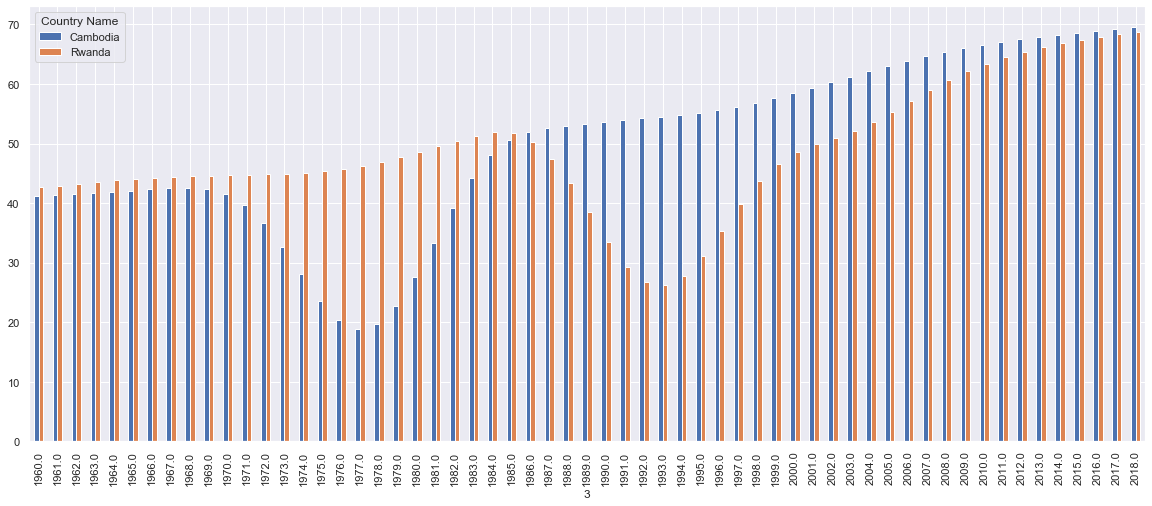

In [29]:
# You can see the exceptionally low values of even 18 in Combodia and 26 in Rwanda. Now such is low expectancy is
# probably because of the genicode that occured in the latd 70's and early 90's respectively. The data related 
# to some important event in the past. This is under a special case so we will remove these outliers

out_lie = data.loc[[data.index[110], data.index[181]], :]
print(out_lie)
out_lie.T.plot(kind = 'bar', figsize = (20, 8))

In [30]:
# Remove the outlying countries

data.drop([data.index[110], data.index[181]], inplace = True)
data

3                                                      1960.0     1961.0  \
Country Name                                                               
Aruba                                               65.662000  66.074000   
Afghanistan                                         32.446000  32.962000   
Angola                                              37.524000  37.811000   
Albania                                             62.283000  63.301000   
Arab World                                          46.546909  47.141621   
United Arab Emirates                                51.537000  52.560000   
Argentina                                           65.055000  65.176000   
Armenia                                             65.972000  66.403000   
Antigua and Barbuda                                 61.968000  62.523000   
Australia                                           70.817073  70.973171   
Austria                                             68.585610  69.577317   
Azerbaijan                                          61.034000  61.256000   
Burundi                                             41.281000  41.592000   
Belgium                                             69.701951  70.520976   
Benin                                               37.271000  37.727000   
Burkina Faso                                        34.432000  34.897000   
Bangladesh                                          45.379000  45.970000   
Bulgaria                                            69.247561  70.195610   
Bahrain                                             51.869000  53.235000   
Bahamas, The                                        64.740000  64.885000   
Bosnia and Herzegovina                              60.353000  61.019000   
Belarus                                             67.708098  68.212659   
Belize                                              59.981000  60.531000   
Bolivia                                             41.820000  42.150000   
Brazil                                              54.143000  54.634000   
Barbados                                            64.472000  65.198000   
Brunei Darussalam                                   54.810000  55.810000   
Bhutan                                              34.526000  34.889000   
Botswana                                            49.179000  49.684000   
Central African Republic                            36.249000  36.715000   
Canada                                              71.133171  71.346098   
Central Europe and the Baltics                      67.821389  68.262198   
Switzerland                                         71.313415  71.644878   
Channel Islands                                     70.739000  70.833000   
Chile                                               57.219000  57.616000   
China                                               43.725000  44.051000   
Cote d'Ivoire                                       36.095000  36.948000   
Cameroon                                            41.785000  42.255000   
Congo, Dem. Rep.                                    41.098000  41.312000   
Congo, Rep.                                         45.721000  46.338000   
Colombia                                            57.269000  57.813000   
Comoros                                             41.447000  41.846000   
Cabo Verde                                          48.461000  48.660000   
Costa Rica                                          60.381000  61.018000   
Caribbean small states                              62.746295  63.126131   
Cuba                                                63.834000  64.446000   
Cyprus                                              69.618000  69.949000   
Czech Republic                                      70.348780  70.512683   
Germany                                             69.310024  69.508000   
Djibouti                                            44.038000  44.469000   
Denmark                                         

In [32]:
# Fill the remaining null values with 0 to get a good a good dataset with atleat 45 years of data available out of 59 for each country

data.fillna(0, inplace = True)
data

3                                                      1960.0     1961.0  \
Country Name                                                               
Aruba                                               65.662000  66.074000   
Afghanistan                                         32.446000  32.962000   
Angola                                              37.524000  37.811000   
Albania                                             62.283000  63.301000   
Arab World                                          46.546909  47.141621   
United Arab Emirates                                51.537000  52.560000   
Argentina                                           65.055000  65.176000   
Armenia                                             65.972000  66.403000   
Antigua and Barbuda                                 61.968000  62.523000   
Australia                                           70.817073  70.973171   
Austria                                             68.585610  69.577317   
Azerbaijan                                          61.034000  61.256000   
Burundi                                             41.281000  41.592000   
Belgium                                             69.701951  70.520976   
Benin                                               37.271000  37.727000   
Burkina Faso                                        34.432000  34.897000   
Bangladesh                                          45.379000  45.970000   
Bulgaria                                            69.247561  70.195610   
Bahrain                                             51.869000  53.235000   
Bahamas, The                                        64.740000  64.885000   
Bosnia and Herzegovina                              60.353000  61.019000   
Belarus                                             67.708098  68.212659   
Belize                                              59.981000  60.531000   
Bolivia                                             41.820000  42.150000   
Brazil                                              54.143000  54.634000   
Barbados                                            64.472000  65.198000   
Brunei Darussalam                                   54.810000  55.810000   
Bhutan                                              34.526000  34.889000   
Botswana                                            49.179000  49.684000   
Central African Republic                            36.249000  36.715000   
Canada                                              71.133171  71.346098   
Central Europe and the Baltics                      67.821389  68.262198   
Switzerland                                         71.313415  71.644878   
Channel Islands                                     70.739000  70.833000   
Chile                                               57.219000  57.616000   
China                                               43.725000  44.051000   
Cote d'Ivoire                                       36.095000  36.948000   
Cameroon                                            41.785000  42.255000   
Congo, Dem. Rep.                                    41.098000  41.312000   
Congo, Rep.                                         45.721000  46.338000   
Colombia                                            57.269000  57.813000   
Comoros                                             41.447000  41.846000   
Cabo Verde                                          48.461000  48.660000   
Costa Rica                                          60.381000  61.018000   
Caribbean small states                              62.746295  63.126131   
Cuba                                                63.834000  64.446000   
Cyprus                                              69.618000  69.949000   
Czech Republic                                      70.348780  70.512683   
Germany                                             69.310024  69.508000   
Djibouti                                            44.038000  44.469000   
Denmark                                         

In [33]:
data.shape

(234, 59)

# Satatictical Analysis

In [34]:
# Lets do the analysis again now with this better and more balanced data

analyze = data.stack().groupby(level = 0).describe()
analyze

count       mean  \
Country Name                                                           
Afghanistan                                          59.0  48.932153   
Albania                                              59.0  71.563441   
Algeria                                              59.0  63.337186   
Angola                                               59.0  46.514169   
Antigua and Barbuda                                  59.0  70.692441   
Arab World                                           59.0  61.753741   
Argentina                                            59.0  71.031729   
Armenia                                              59.0  70.604831   
Aruba                                                59.0  72.340661   
Australia                                            59.0  76.502770   
Austria                                              59.0  75.197230   
Azerbaijan                                           59.0  65.950000   
Bahamas, The                                         59.0  69.356695   
Bahrain                                              59.0  69.930390   
Bangladesh                                           59.0  58.323525   
Barbados                                             59.0  73.704475   
Belarus                                              59.0  70.094850   
Belgium                                              59.0  75.508193   
Belize                                               59.0  68.946746   
Benin                                                59.0  50.886237   
Bhutan                                               59.0  52.799034   
Bolivia                                              59.0  56.048932   
Bosnia and Herzegovina                               59.0  70.962390   
Botswana                                             59.0  56.762508   
Brazil                                               59.0  65.812203   
Brunei Darussalam                                    59.0  68.694119   
Bulgaria                                             59.0  71.823526   
Burkina Faso                                         59.0  47.947610   
Burundi                                              59.0  49.021831   
Cabo Verde                                           59.0  62.925797   
Cameroon                                             59.0  51.111356   
Canada                                               59.0  76.826639   
Caribbean small states                               59.0  69.261642   
Central African Republic                             59.0  45.910424   
Central Europe and the Baltics                       59.0  71.708513   
Chad                                                 59.0  46.062305   
Channel Islands                                      59.0  76.132339   
Chile                                                59.0  71.140220   
China                                                59.0  66.378610   
Colombia                                             59.0  68.836678   
Comoros                                              59.0  54.207017   
Congo, Dem. Rep.                                     59.0  49.184831   
Congo, Rep.                                          59.0  54.243339   
Costa Rica                                           59.0  73.155864   
Cote d'Ivoire                                        59.0  49.453847   
Croatia                                              59.0  71.785861   
Cuba                                                 59.0  73.969831   
Cyprus                                               59.0  75.967932   
Czech Republic                                       59.0  73.056829   
Denmark                                              59.0  75.666449   
Djibouti                                             59.0  55.025136   
Dominican Republic                                   59.0  65.058831   
Early-demographic dividend                           59.0  59.279214   
East Asia & Pacific                                  59.0  66.685150   
East Asia & Pacific 

In [36]:
# We can see that none of the value is still missing

len(analyze.index[analyze['count']< 59])

0

Iceland  has the maximum average life expectancy of  78.00621331118644  overall years. 
Sierra Leone  has the minimum average life expectancy of  40.733610169491534  over all years


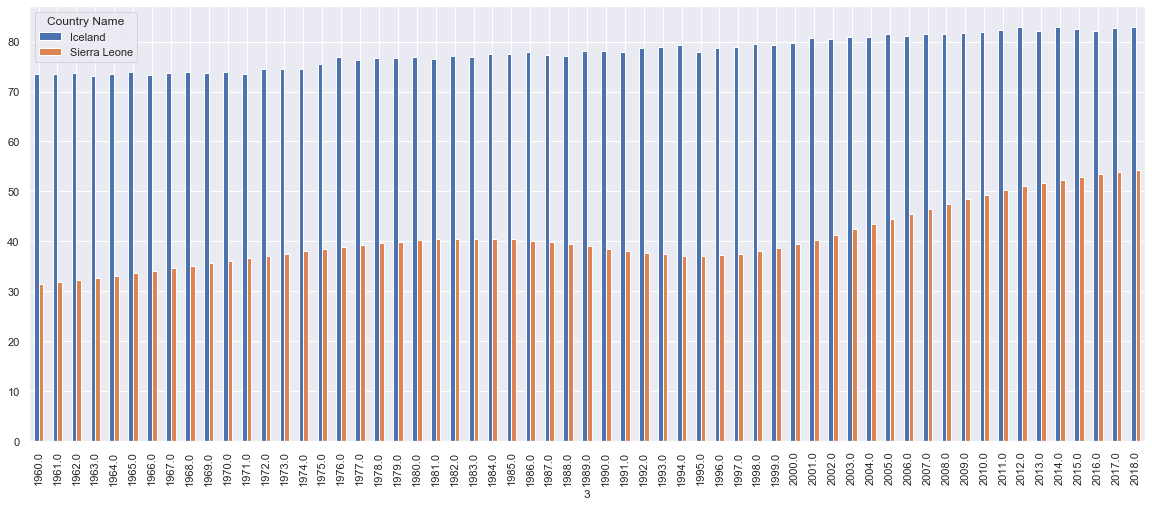

In [42]:
# Lets see the maximum and minimum stats w.r.t countries
# Lets look at the mean, We can see a  clear difference of altitudes between the two graphs

print(analyze['mean'].idxmax(), ' has the maximum average life expectancy of ', analyze['mean'].loc[analyze['mean'].idxmax()], ' overall years. ')
print(analyze['mean'].idxmin(),' has the minimum average life expectancy of ', analyze['mean'].loc[analyze['mean'].idxmin()], ' over all years')

ana1 = data.loc[[analyze['mean'].idxmax(),analyze['mean'].idxmin()], :]
ana1.T.plot(kind = 'bar', figsize = (20, 8))

Israel  has the maximum standard deviation of life expectancy of  19.782535864150404 over all the years
Ukraine has the minimum standard deviation of life expectancy of  1.1929402728885394 over all the years


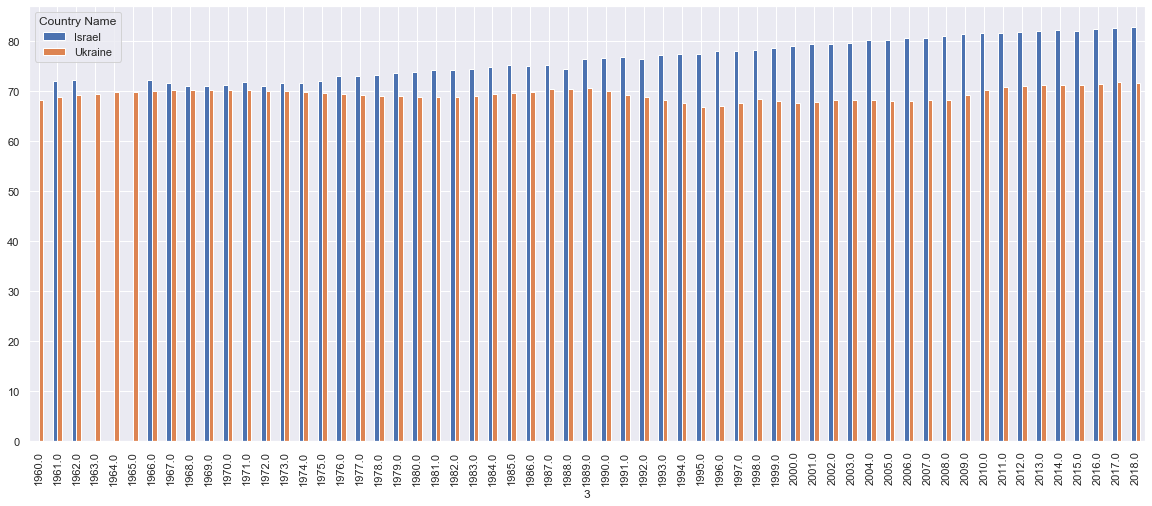

In [47]:
# Lates see which country has varied the most and the least in life expectancy over the years
# We can see that the constant rise gives Israel a large variance
# NOTE tht 2-3 war years have 0 value (missing) Israel that gives variance a little more boost
# but generally the data os acceptable. We will trade off some advantages instead of
# removing many more countries with acceptable amount of data
# We can also insert the mean value instead of 0 in place of missing values for better continuity in the data
# but it totally depends on the task at hands so if you want a classification problem amd the test data will
# likely have missing values too then it is better to have a separate identifier (like '0') for missing values
# On the other hand for continuous predictions (like predicting life expectancy next year) it is better to 
# maintain continuity and use averages

print(analyze['std'].idxmax(), ' has the maximum standard deviation of life expectancy of ', analyze['std'].loc[analyze['std'].idxmax()], 'over all the years')
print(analyze['std'].idxmin(), 'has the minimum standard deviation of life expectancy of ', analyze['std'].loc[analyze['std'].idxmin()], 'over all the years')

ana1 = data.loc[[analyze['std'].idxmax(), analyze['std'].idxmin()], :]
ana1.T.plot(kind = 'bar', figsize = (20, 8))

# Comparison On Different Factors

# Richest Ecenomy vs Poorest Ecenomy vs Largest Millitary

In [48]:
# Lets see different countries based on region or other factors for a better comparison 
# and a better understanding of the relation. I used Asian countries, largest economy, lowest economy and largest military

Asian  = ['Pakistan', 'India', 'Afghanistan', 'Bangladesh', 'China', 'Iran, Islamic Rep.']
largest_economies = ['United States','China','Japan','Germany','United Kingdom','France']
lowest_economies = ['South Sudan','Burundi','Eritrea','Malawi','Central African Republic','Niger']
largest_militaries = ['China','India','Russian Federation','United States','Korea, Dem. People’s Rep.','Pakistan']

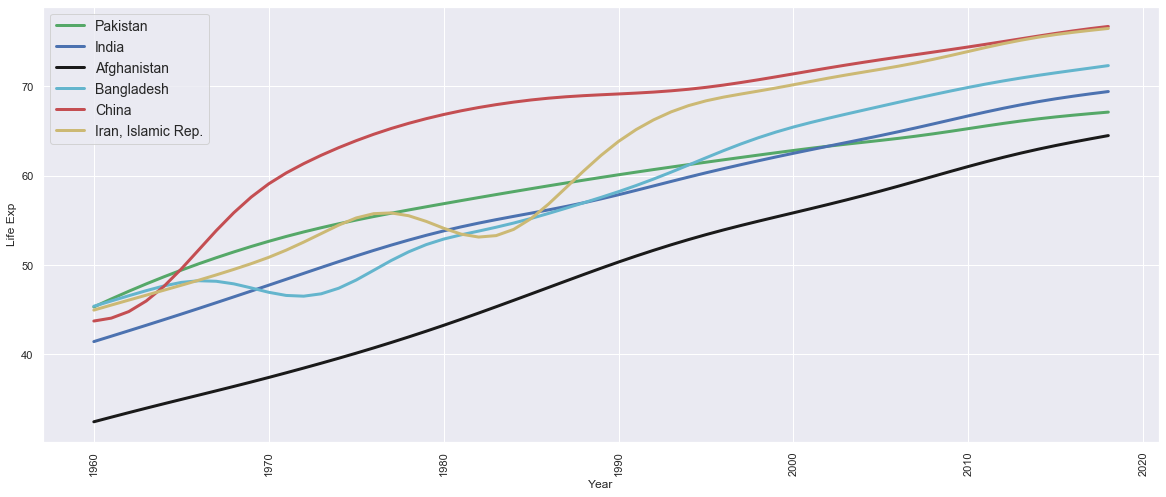

In [49]:
# Lets plot for the south asian countries

fig  = plt.figure(figsize = (20, 8))
colors = ['g-', 'b-', 'k-', 'c-', 'r-', 'y-', 'm-']
for c in range(len(Asian)):
    row = data.loc[Asian[c], :]
    plt.plot(row, colors[c&len(colors)], label = Asian[c], linewidth = 3)
    plt.xticks(rotation = 90)
    plt.legend(loc = 'upper left', prop = {'size':14})
    plt.xlabel('Year')
    plt.ylabel('Life Exp')
plt.show()

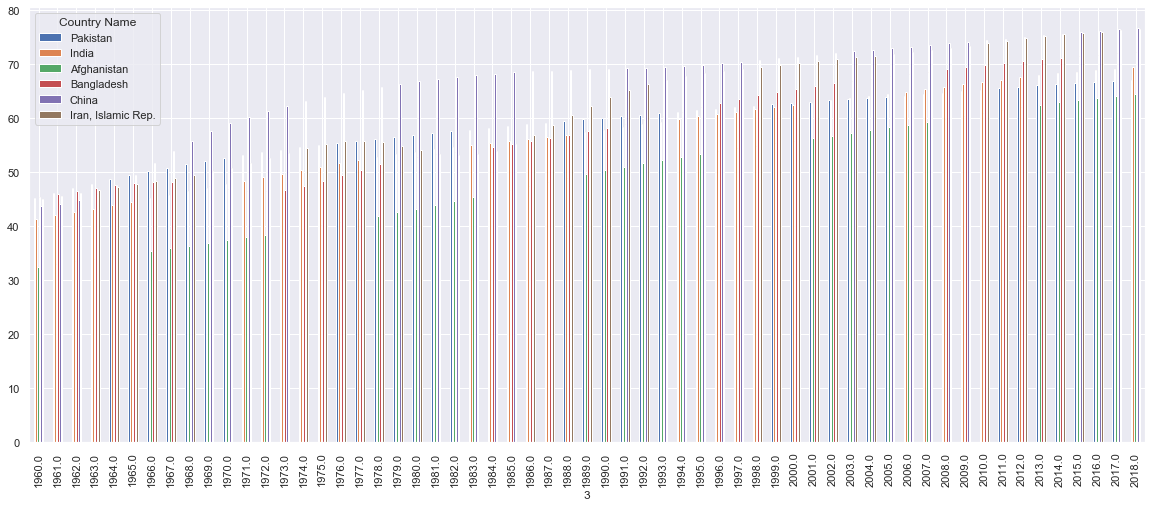

In [50]:
# Lets create a bar graph for South Asian countries

SA = data.loc[ Asian, :]
SA.T.plot(kind = 'bar', figsize = (20, 8))

In [51]:
# Lets make the visualizations better while keeping the generaltrends in life expectancy by using life exp
# after every 4 years

data_new = data[data.columns[::4]]
data_new

3                                                      1960.0     1964.0  \
Country Name                                                               
Aruba                                               65.662000  67.113000   
Afghanistan                                         32.446000  34.463000   
Angola                                              37.524000  38.760000   
Albania                                             62.283000  65.463000   
Arab World                                          46.546909  48.910019   
United Arab Emirates                                51.537000  55.555000   
Argentina                                           65.055000  65.426000   
Armenia                                             65.972000  67.716000   
Antigua and Barbuda                                 61.968000  63.992000   
Australia                                           70.817073  70.880976   
Austria                                             68.585610  69.921951   
Azerbaijan                                          61.034000  61.889000   
Burundi                                             41.281000  42.540000   
Belgium                                             69.701951  70.755122   
Benin                                               37.271000  39.130000   
Burkina Faso                                        34.432000  36.331000   
Bangladesh                                          45.379000  47.649000   
Bulgaria                                            69.247561  71.121220   
Bahrain                                             51.869000  57.182000   
Bahamas, The                                        64.740000  65.219000   
Bosnia and Herzegovina                              60.353000  62.818000   
Belarus                                             67.708098  69.289927   
Belize                                              59.981000  62.241000   
Bolivia                                             41.820000  43.199000   
Brazil                                              54.143000  56.121000   
Barbados                                            64.472000  66.860000   
Brunei Darussalam                                   54.810000  58.638000   
Bhutan                                              34.526000  36.220000   
Botswana                                            49.179000  51.099000   
Central African Republic                            36.249000  38.201000   
Canada                                              71.133171  71.776341   
Central Europe and the Baltics                      67.821389  69.052485   
Switzerland                                         71.313415  72.077805   
Channel Islands                                     70.739000  71.143000   
Chile                                               57.219000  58.927000   
China                                               43.725000  47.592000   
Cote d'Ivoire                                       36.095000  39.358000   
Cameroon                                            41.785000  43.639000   
Congo, Dem. Rep.                                    41.098000  41.995000   
Congo, Rep.                                         45.721000  48.016000   
Colombia                                            57.269000  59.308000   
Comoros                                             41.447000  43.043000   
Cabo Verde                                          48.461000  49.797000   
Costa Rica                                          60.381000  62.807000   
Caribbean small states                              62.746295  64.113791   
Cuba                                                63.834000  66.327000   
Cyprus                                              69.618000  70.895000   
Czech Republic                                      70.348780  70.459512   
Germany                                             69.310024  70.013707   
Djibouti                                            44.038000  45.727000   
Denmark                                         

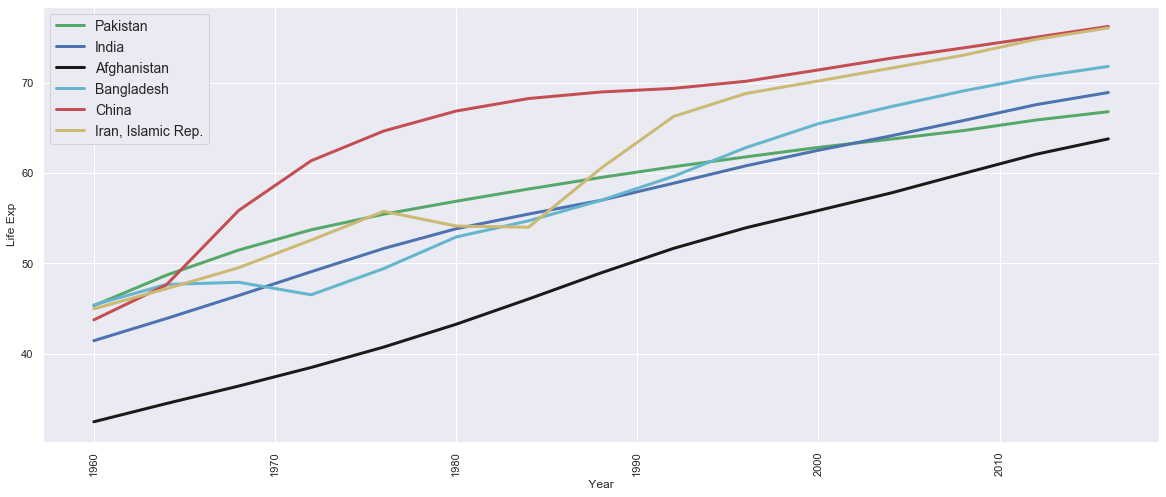

In [53]:
# We can see China's Life Expectancy rising in last 8-10 years of Mao Tse Tung's Regin
# Iran has risen a lot after revolution
# Pakistan after some accelration is decelrating

fig = plt.figure(figsize = (20, 8))
colors = ['g-','b-','k-','c-','r-','y-','m-']
for c in range(len(Asian)):
    row = data_new.loc[Asian[c], :]
    plt.plot(row, colors[c%len(colors)], label = Asian[c], linewidth = 3)
    plt.xticks(rotation = 90)
    plt.legend(loc = 'upper left', prop = {'size': 14})
    plt.xlabel(' Year ')
    plt.ylabel('Life Exp')
plt.show()

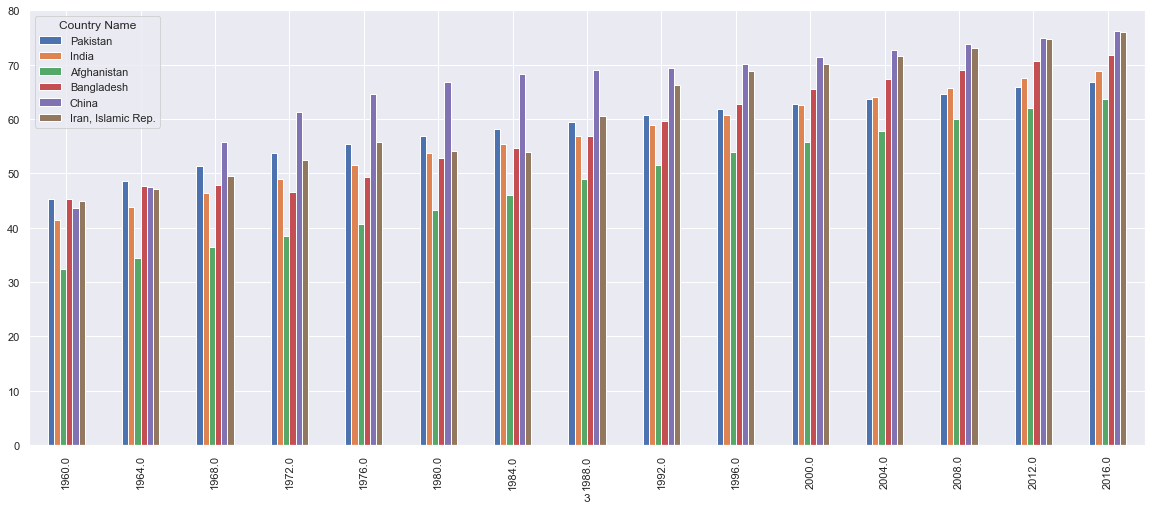

In [56]:
SA = data_new.loc[  Asian, :]
SA.T.plot(kind = 'bar', figsize = (20, 8))

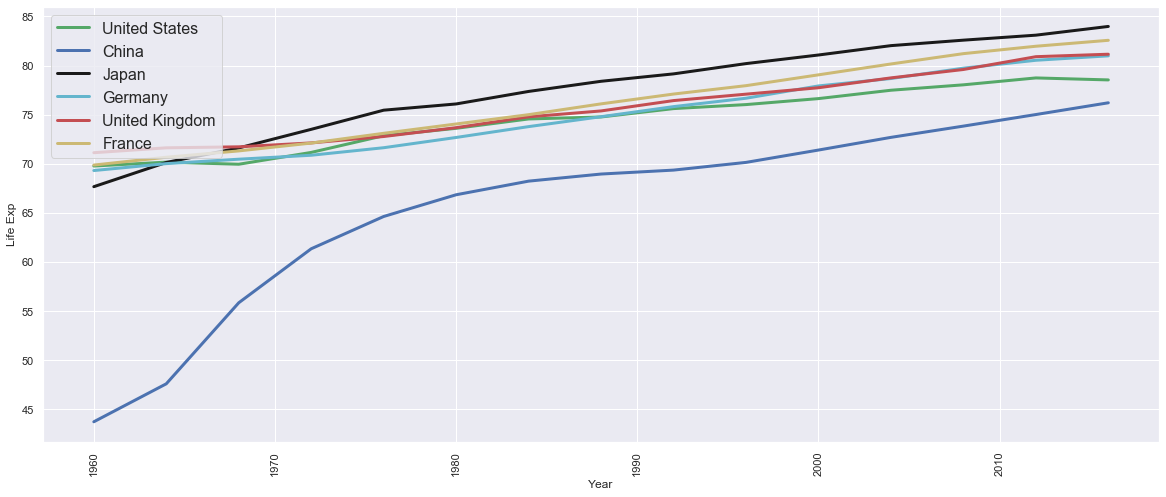

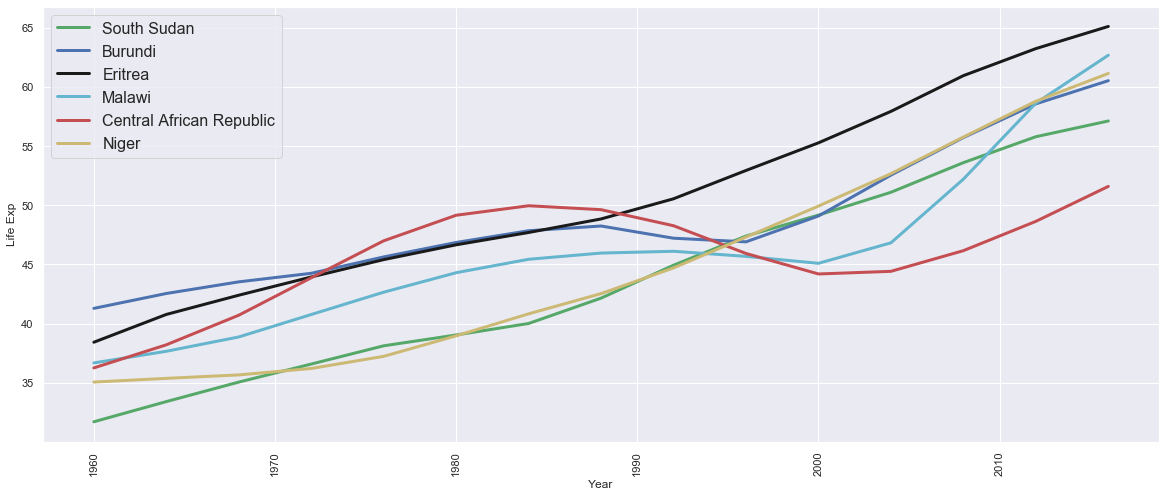

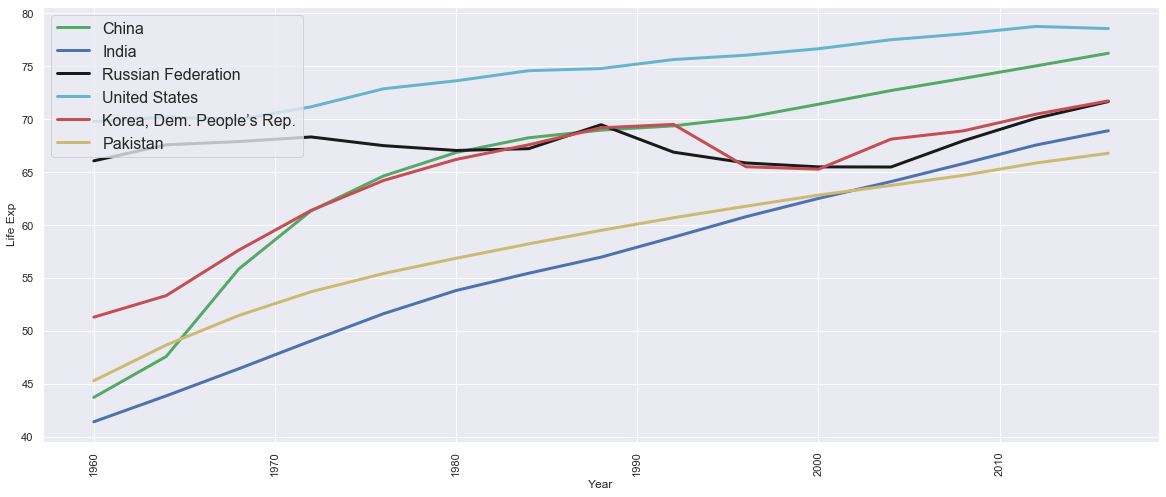

In [58]:
# Lets look on the different sections that we created. Largest economies are all above 75 and average is above 80.
# The lower GDP per Capita countries average between 55 and 60. Also all the top economy countries had better 
# life expectancy even in 1960 than many bottom economY countries now (With the exception of China where the 
# life expectancy boom also shows the Chinese economic boom)

sec = [largest_economies, lowest_economies, largest_militaries]


colors = ['g-','b-','k-','c-','r-','y-','m-']
for i in sec:
    fig = plt.figure(figsize = (20, 8))
    for c in range(len(i)):
        row = data_new.loc[i[c], :]
        plt.plot(row, colors[c%len(colors)], label = i[c], linewidth = 3)
        plt.xticks(rotation = 90)
        plt.legend(loc = 'upper left', prop = {'size': 16})
        plt.xlabel('Year')
        plt.ylabel('Life Exp')
    plt.show()

# Similar Curve (Top 5 Life Expectancies similar to Pakistan)

In [59]:
# Lets try to find the top 5 most similar life expectancies as Pakistan.
# This will help us drive some other relations between these countries

pak = data.loc['Pakistan', :]
pak

3
1960.0    45.299
1961.0    46.197
1962.0    47.059
1963.0    47.884
1964.0    48.670
1965.0    49.420
1966.0    50.134
1967.0    50.812
1968.0    51.457
1969.0    52.070
1970.0    52.649
1971.0    53.192
1972.0    53.699
1973.0    54.171
1974.0    54.613
1975.0    55.028
1976.0    55.421
1977.0    55.796
1978.0    56.158
1979.0    56.512
1980.0    56.860
1981.0    57.206
1982.0    57.546
1983.0    57.882
1984.0    58.213
1985.0    58.540
1986.0    58.863
1987.0    59.180
1988.0    59.493
1989.0    59.799
1990.0    60.100
1991.0    60.393
1992.0    60.680
1993.0    60.960
1994.0    61.235
1995.0    61.505
1996.0    61.773
1997.0    62.039
1998.0    62.303
1999.0    62.564
2000.0    62.820
2001.0    63.066
2002.0    63.300
2003.0    63.522
2004.0    63.736
2005.0    63.951
2006.0    64.176
2007.0    64.420
2008.0    64.685
2009.0    64.969
2010.0    65.264
2011.0    65.562
2012.0    65.849
2013.0    66.117
2014.0    66.360
2015.0    66.577
2016.0    66.770
2017.0    66.947
2018.0    67

In [60]:
# I will use cosine similarity for measurement of the distances

from sklearn.metrics.pairwise import cosine_similarity
sim_mat = cosine_similarity([pak], data)[0]
sort = sorted(sim_mat)[-6:]
indxs = []
for sor in sort:
    indx = np.where(sim_mat == sor)[0][0]
    indxs.append(indx)
data.iloc[indxs]

3                       1960.0     1961.0     1962.0     1963.0     1964.0  \
Country Name                                                                 
Middle income        47.584682  48.110172  48.720213  49.443575  50.288962   
IBRD only            48.676177  49.196206  49.794693  50.532218  51.395143   
Low & middle income  47.081345  47.596588  48.193258  48.898482  49.718044   
IDA & IBRD total     47.530344  48.040286  48.620262  49.319439  50.119730   
Dominican Republic   51.602000  52.306000  52.997000  53.675000  54.340000   
Pakistan             45.299000  46.197000  47.059000  47.884000  48.670000   

3                       1965.0     1966.0     1967.0     1968.0     1969.0  \
Country Name                                                                 
Middle income        51.221294  52.190536  53.145424  54.045823  54.860025   
IBRD only            52.364595  53.374704  54.368982  55.329692  56.183750   
Low & middle income  50.619544  51.556580  52.479847  53.351937  54.143279   
IDA & IBRD total     51.004214  51.917197  52.808806  53.665525  54.428480   
Dominican Republic   54.993000  55.635000  56.267000  56.889000  57.498000   
Pakistan             49.420000  50.134000  50.812000  51.457000  52.070000   

3                       1970.0     1971.0     1972.0     1973.0     1974.0  \
Country Name                                                                 
Middle income        55.605992  56.271249  56.875775  57.463428  58.034885   
IBRD only            56.976202  57.676040  58.321292  58.934043  59.529447   
Low & middle income  54.870369  55.521432  56.114429  56.690392  57.249643   
IDA & IBRD total     55.137144  55.768917  56.356573  56.920463  57.473543   
Dominican Republic   58.093000  58.671000  59.229000  59.764000  60.277000   
Pakistan             52.649000  53.192000  53.699000  54.171000  54.613000   

3                       1975.0     1976.0     1977.0     1978.0     1979.0  \
Country Name                                                                 
Middle income        58.559903  59.082961  59.578618  60.047923  60.468248   
IBRD only            60.052809  60.575549  61.058723  61.510725  61.915216   
Low & middle income  57.763489  58.273475  58.756031  59.212963  59.623742   
IDA & IBRD total     57.970549  58.471050  58.941010  59.385682  59.789677   
Dominican Republic   60.764000  61.226000  61.663000  62.079000  62.477000   
Pakistan             55.028000  55.421000  55.796000  56.158000  56.512000   

3                       1980.0     1981.0     1982.0     1983.0     1984.0  \
Country Name                                                                 
Middle income        60.868995  61.246896  61.613857  61.939748  62.240187   
IBRD only            62.291690  62.668395  63.027190  63.342885  63.632218   
Low & middle income  60.016107  60.388004  60.750074  61.073600  61.372304   
IDA & IBRD total     60.167022  60.543237  60.900079  61.217224  61.507700   
Dominican Republic   62.861000  63.234000  63.601000  63.964000  64.326000   
Pakistan             56.860000  57.206000  57.546000  57.882000  58.213000   

3                       1985.0     1986.0     1987.0     1988.0     1989.0  \
Country Name                                                                 
Middle income        62.572927  62.934579  63.228460  63.499519  63.749806   
IBRD only            63.964612  64.339655  64.639056  64.925304  65.182213   
Low & middle income  61.699151  62.049926  62.333807  62.591927  62.826688   
IDA & IBRD total     61.826910  62.172948  62.449522  62.706440  62.934185   
Dominican Republic   64.692000  65.065000  65.443000  65.822000  66.201000   
Pakistan             58.540000  58.863000  59.180000  59.493000  59.799000   

3                       1990.0     1991.0     1992.0     1993.0     1994.0  \
Country Name                                                                 
Middle income        63.986522  64.220610  64.384302  64.545062  64.765160   
IBRD only       

In [62]:
simil = data.iloc[indxs]
sim_ind = simil.index

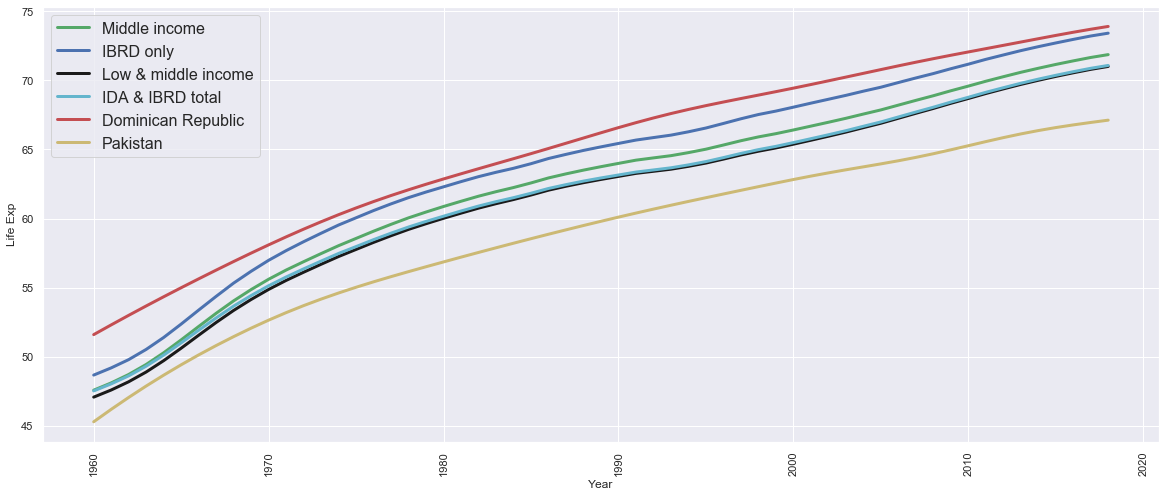

In [64]:
# Plot the 6 graphs and see if they are really similar
# From the graphs we can see they form almost the same curve
# It also tells us the group that Pakistan lies closer to i.e the lower middle income and the middle income

fig = plt.figure(figsize = (20, 8))
for c in range(len(simil)):
    row = simil.loc[sim_ind, :]
    plt.plot(row, colors[c%len(colors)], label = sim_ind[c], linewidth = 3)
    plt.xticks(rotation = 90)
    plt.legend(loc = 'upper left', prop = {'size' : 16})
    plt.xlabel('Year')
    plt.ylabel('Life Exp')
plt.show()